In [9]:
!pip install tensorflow

In [10]:
!pip install keras

In [11]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [12]:
!pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=5672a42e710b3b16ac744e92ddef1aa14406f53956b516a6f752eedb9c9ecefe
  Stored in directory: c:\users\g.g. sunder\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [13]:
!pip install flask

# DATA AUGMENTATION

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
xtrain = train_data_gen.flow_from_directory(r"C:\Users\G.G. SUNDER\flowers",target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [22]:
xtest = test_datagen.flow_from_directory(r"C:\Users\G.G. SUNDER\flowers",
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [23]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# CNN MODEL

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [25]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

In [26]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
model.fit(xtrain, steps_per_epoch = len(xtrain),epochs = 10,
          validation_data = xtest,validation_steps = len(xtest))

Epoch 1/10
44/44 [==============================] - 80s 2s/step - loss: 2.0344 - accuracy: 0.3771 - val_loss: 1.2202 - val_accuracy: 0.4966
Epoch 2/10
44/44 [==============================] - 68s 2s/step - loss: 1.1381 - accuracy: 0.5439 - val_loss: 1.0234 - val_accuracy: 0.6018
Epoch 3/10
44/44 [==============================] - 65s 1s/step - loss: 1.0296 - accuracy: 0.6041 - val_loss: 1.0732 - val_accuracy: 0.5930
Epoch 4/10
44/44 [==============================] - 73s 2s/step - loss: 0.9617 - accuracy: 0.6254 - val_loss: 0.9527 - val_accuracy: 0.6421
Epoch 5/10
44/44 [==============================] - 64s 1s/step - loss: 0.9283 - accuracy: 0.6391 - val_loss: 0.8663 - val_accuracy: 0.6732
Epoch 6/10
44/44 [==============================] - 64s 1s/step - loss: 0.8946 - accuracy: 0.6514 - val_loss: 0.8244 - val_accuracy: 0.6810
Epoch 7/10
44/44 [==============================] - 70s 2s/step - loss: 0.8614 - accuracy: 0.6648 - val_loss: 0.8863 - val_accuracy: 0.6646
Epoch 8/10
44/44 [==

# MODEL TUNING


In [28]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]


In [29]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))

C:\Users\GG77DA~1.SUN\AppData\Local\Temp/ipykernel_19428/147617075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))


Epoch 1/10
44/44 [==============================] - 72s 2s/step - loss: 0.7742 - accuracy: 0.7040 - val_loss: 0.7431 - val_accuracy: 0.7234 - lr: 0.0010
Epoch 2/10
44/44 [==============================] - 72s 2s/step - loss: 0.7632 - accuracy: 0.7081 - val_loss: 0.7016 - val_accuracy: 0.7403 - lr: 0.0010
Epoch 3/10
44/44 [==============================] - 67s 2s/step - loss: 0.7511 - accuracy: 0.7197 - val_loss: 0.6951 - val_accuracy: 0.7382 - lr: 0.0010
Epoch 4/10
44/44 [==============================] - 67s 2s/step - loss: 0.7234 - accuracy: 0.7278 - val_loss: 0.6587 - val_accuracy: 0.7491 - lr: 0.0010
Epoch 5/10
44/44 [==============================] - 67s 2s/step - loss: 0.7061 - accuracy: 0.7380 - val_loss: 0.6494 - val_accuracy: 0.7540 - lr: 0.0010
Epoch 6/10
44/44 [==============================] - 67s 2s/step - loss: 0.7074 - accuracy: 0.7338 - val_loss: 0.7038 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 7/10
44/44 [==============================] - 92s 2s/step - loss: 0.6986 - a

# SAVING THE MODEL

In [30]:
model.save("flowerss.h5")

# TESTING THE MODEL

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [41]:
model = load_model("flowerss.h5")

In [42]:
img = image.load_img("175638423_058c07afb9.jpg",target_size = (150,150))

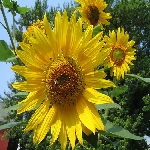

In [43]:
img

In [45]:
img = image.load_img("176458518_f81d4bff8e.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 1s 657ms/step


'tulip'

In [46]:
img = image.load_img("15207766_fc2f1d692c_n.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 63ms/step


'sunflower'